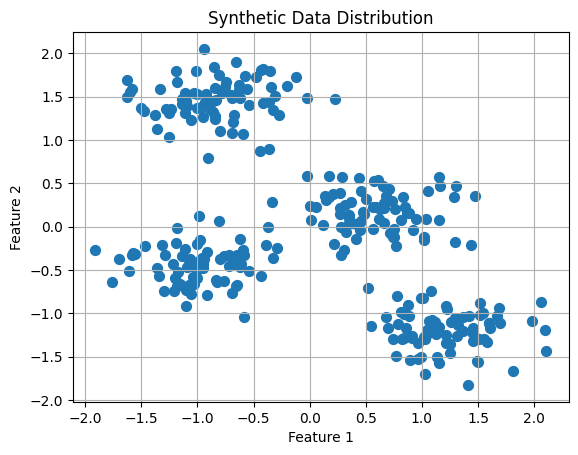

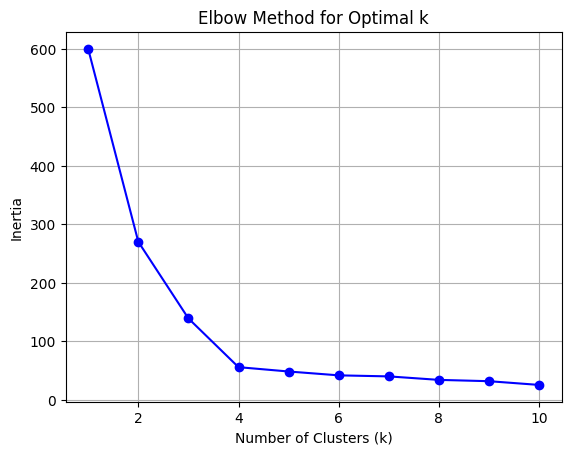

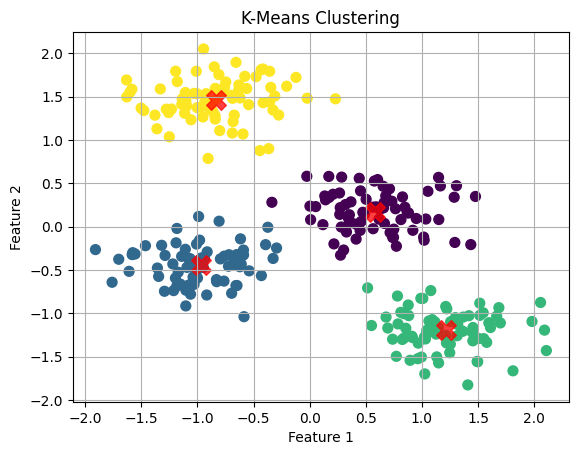

Silhouette Score: 0.657


In [2]:
# task8d8.ipynb

# 1. Import Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 2. Generate Synthetic Data (for clustering)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Visualize Original Data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50)
plt.title("Synthetic Data Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# 5. Elbow Method to find best K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

# 6. Fit KMeans (choose K=4 from elbow curve)
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# 7. Visualize Clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# 8. Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.3f}")
